In [159]:
import matplotlib.pyplot as plt
from IPython.display import Audio
import random
import numpy as np 
from audio_classifier import *

In [7]:
root_dir = 'D:/Datasets/data'
dataset = load_audio_dataset(root_dir)

In [76]:
num_channels = []
sample_rates = []
audio_length = []
for audio_path in dataset[0]:
    audio, sr = librosa.load(audio_path, sr=None)
    sample_rates.append(sr)
    if len(audio.shape) == 1:
        num_channels.append(1)
        audio_length.append(audio.shape[0]/sr)
    else:
        num_channels.append(audio.shape[0])
        audio_length.append(audio.shape[1]/sr)


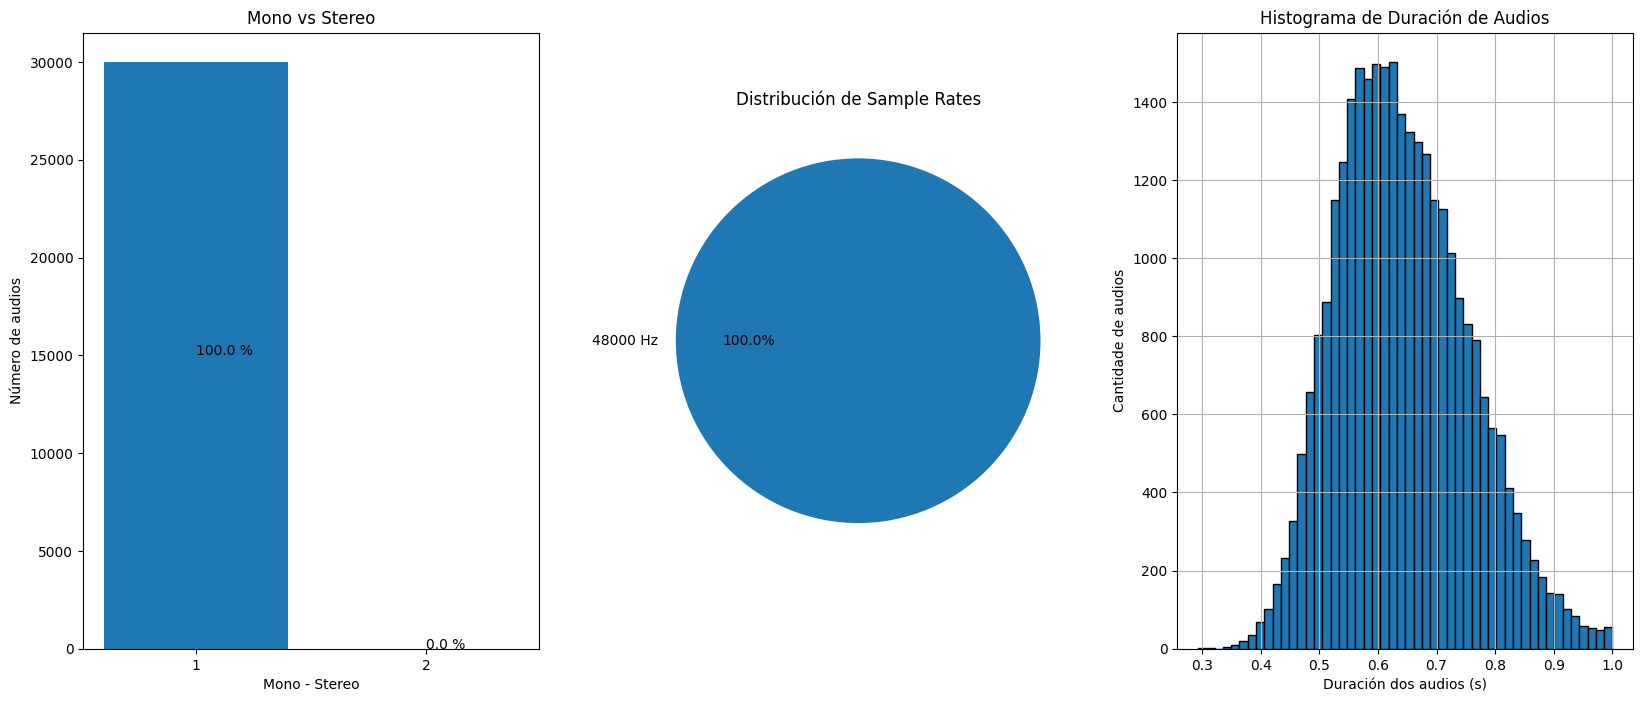

In [183]:
unique_sample_rates = set(sample_rates)
labels_sr = [f"{sr} Hz" for sr in unique_sample_rates]
sizes_sr = [sample_rates.count(sr) for sr in unique_sample_rates]

channels = [1, 2]
sizes_ch = [num_channels.count(ch) for ch in channels]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8))

# Gráfico de barras en el subplot izquierdo
ax1.bar(channels, sizes_ch)
ax1.set_xlabel('Mono - Stereo')
ax1.set_ylabel('Número de audios')
ax1.set_title('Mono vs Stereo')
ax1.set_xticks(channels)
ax1.text(1, int(sizes_ch[0]/2), f"{sizes_ch[0]*100/sum(sizes_ch)} %")
ax1.text(2, int(sizes_ch[1]/2), f"{sizes_ch[1]*100/sum(sizes_ch)} %")

# Gráfico de tarta en el subplot derecho
ax2.pie(sizes_sr, labels=labels_sr, autopct='%1.1f%%')
ax2.set_title('Distribución de Sample Rates')

ax3.hist(audio_length, bins=50, edgecolor='black')
ax3.set_xlabel('Duración dos audios (s)')
ax3.set_ylabel('Cantidade de audios')
ax3.set_title('Histograma de Duración de Audios')
ax3.grid(True)

plt.show()

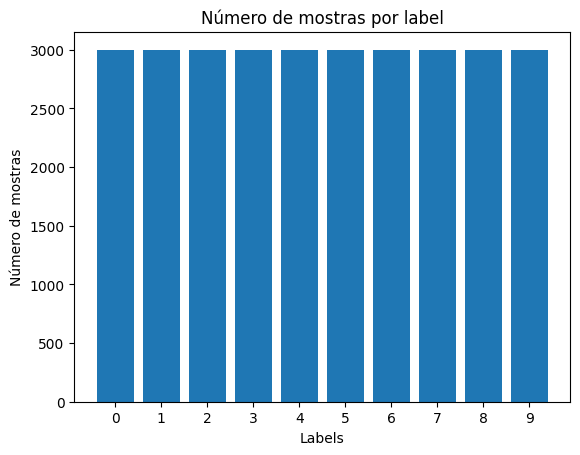

In [36]:
label_counts = {label: dataset[1].count(label) for label in sorted(list(set(dataset[1])))}

plt.figure()
plt.bar(list(label_counts.keys()), list(label_counts.values()))
plt.xlabel('Labels')
plt.ylabel('Número de mostras')
plt.title('Número de mostras por label')
plt.show()

In [113]:
pos_audios_example = []
for i in sorted(list(set(dataset[1]))):
    pos_audios_example.append(random.choice(np.where(np.asarray(dataset)[1] == i)[0]))

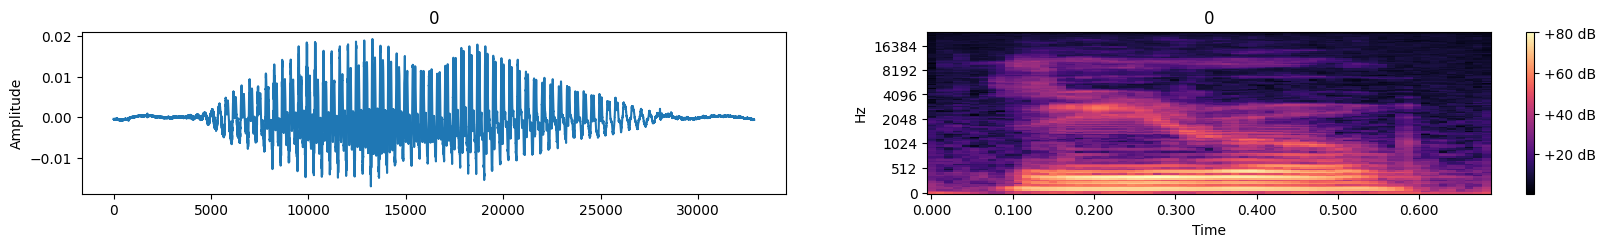

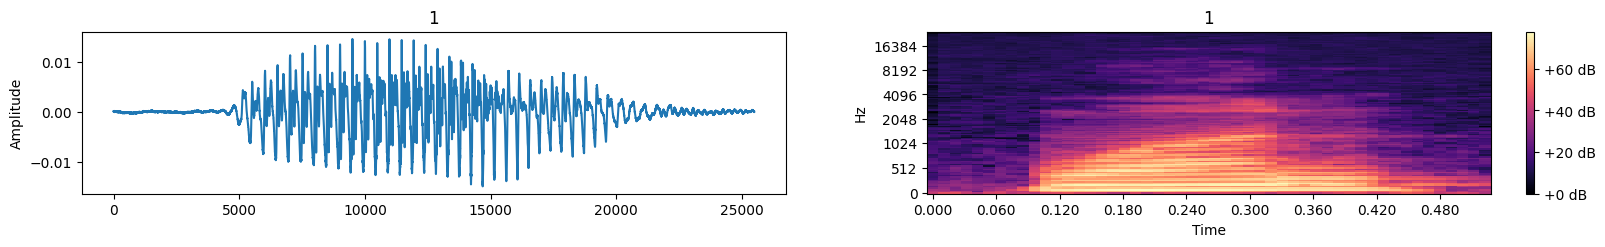

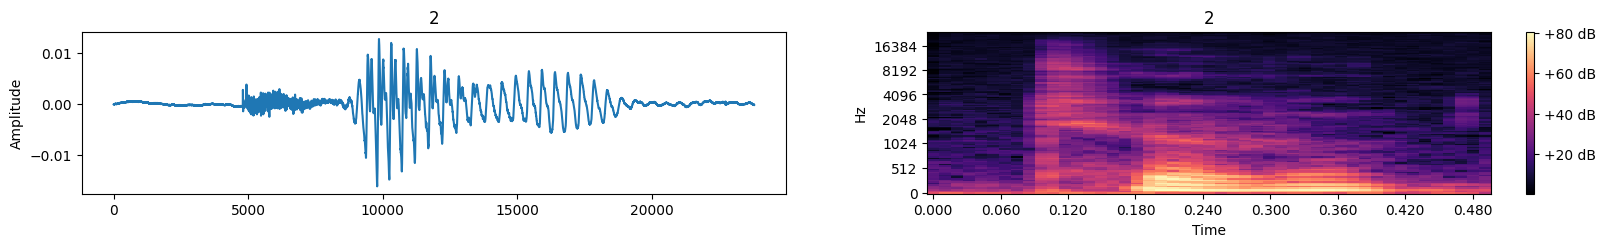

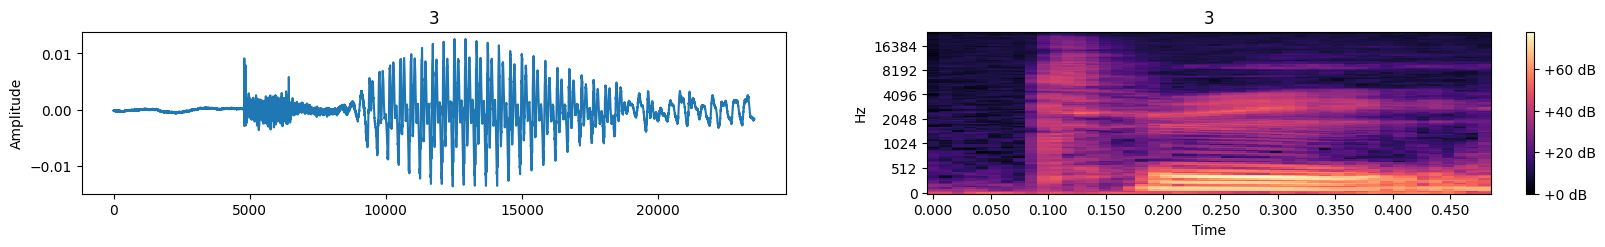

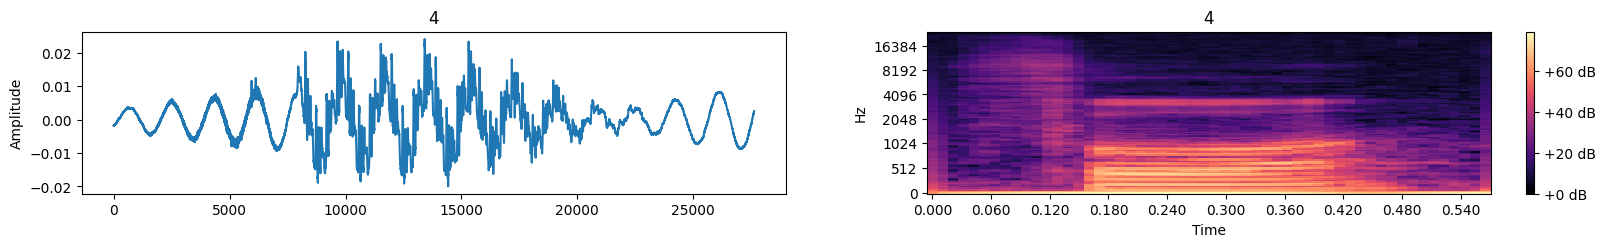

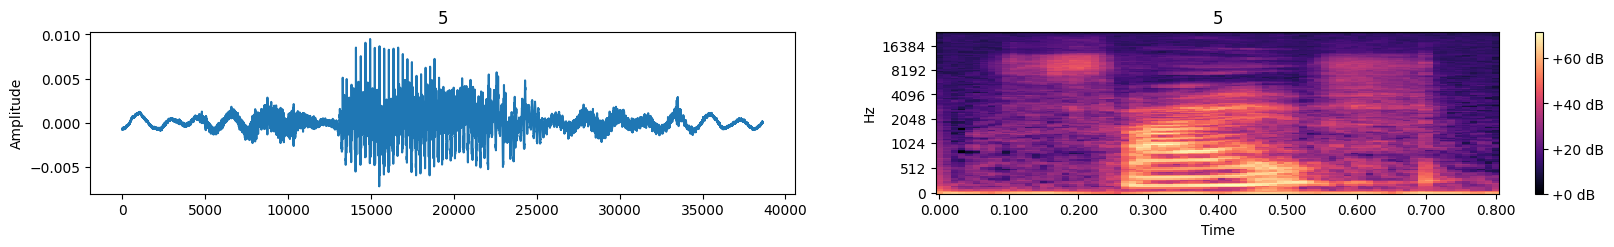

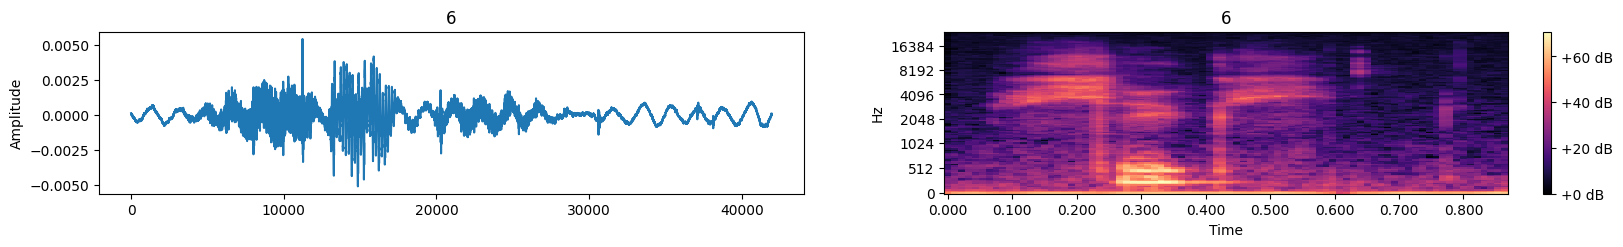

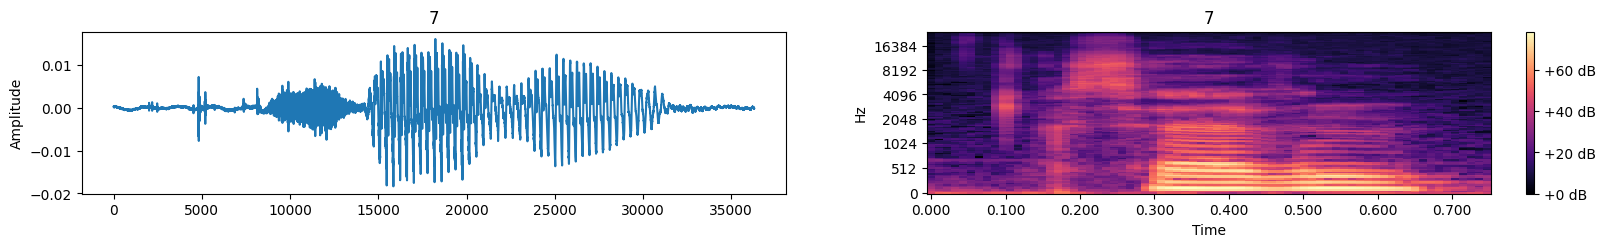

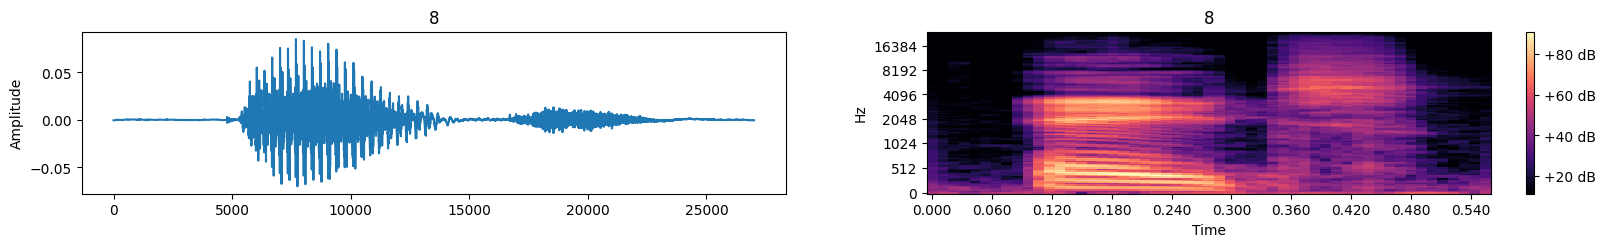

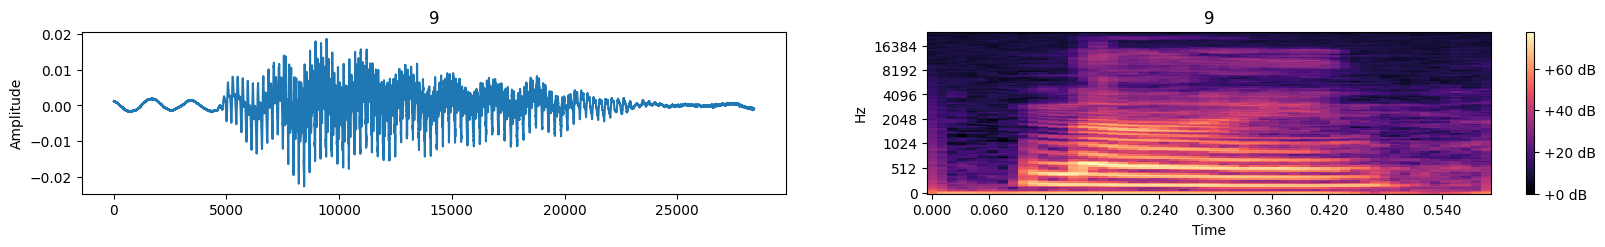

<Figure size 2000x4000 with 0 Axes>

In [182]:
plt.figure(figsize=(20, 40))
for i, pos in enumerate(pos_audios_example):
    waveform, sample_rate = librosa.load(dataset[0][pos], sr=None)
    plt.subplot(10, 2, i*2 + 1)
    plt.plot(waveform)
    plt.ylabel('Amplitude')
    plt.title(str(i))

    sgram = librosa.stft(waveform)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
    
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    
    plt.subplot(10, 2, i*2 + 2)
    librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(str(i))

    plt.subplots_adjust(hspace=1, wspace=0.2)
    
    display(plt.gcf())
    display(Audio(filename=dataset[0][pos]))
    plt.clf()
